In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
os.chdir("/content/drive/My Drive/D/")
os.getcwd()

'/content/drive/My Drive/D'

In [12]:
img = image.load_img("Training/s/WhatsApp Image 2024-01-28 at 12.42.06.jpeg")

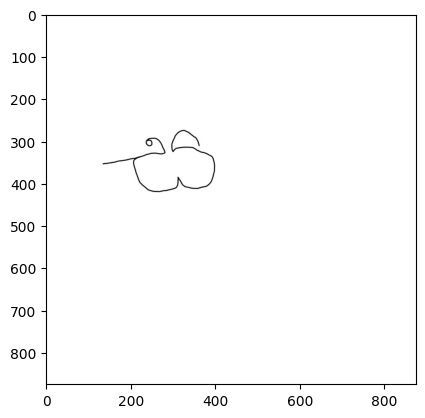

In [13]:
plt.imshow(img)

In [14]:
cv2.imread("Training/s/WhatsApp Image 2024-01-28 at 12.42.06.jpeg").shape

(875, 875, 3)

In [15]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)
# Create an ImageDataGenerator for validation data with pixel value rescaling
validation = ImageDataGenerator(rescale = 1/255)

In [16]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Training/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
# Create a validation dataset generator using the validation ImageDataGenerator
validation_dataset = validation.flow_from_directory('Validation/',
                                                   target_size = (200,200),
                                                   batch_size = 3,
                                                   class_mode = 'binary')

Found 91 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'m': 0, 's': 1}

In [18]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [19]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [20]:
# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [21]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 49s 12s/step - loss: 5.1536 - accuracy: 0.4615 - val_loss: 0.9248 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.7526 - accuracy: 0.6667 - val_loss: 0.7602 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.7116 - accuracy: 0.5333 - val_loss: 0.7283 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 8s 2s/step - loss: 0.7343 - accuracy: 0.4667 - val_loss: 0.6836 - val_accuracy: 0.5870
Epoch 5/30
5/5 [==============================] - 5s 1s/step - loss: 1.0514 - accuracy: 0.5333 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 8s 2s/step - loss: 0.6894 - accuracy: 0.6000 - val_loss: 0.6815 - val_accuracy: 0.5109
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.6920 - accuracy: 0.6667 - val_loss: 0.6609 - val_accuracy: 0.5978
Epoch 8/30
5/5 [=======================

In [22]:
validation_dataset.class_indices

{'m': 0, 's': 1}

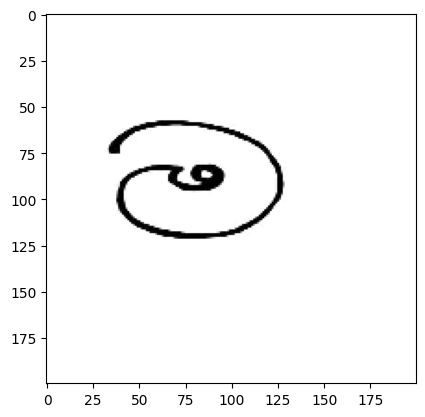

1/1 [==============================] - 0s 48ms/step
This is Letter 's' in Sinhala


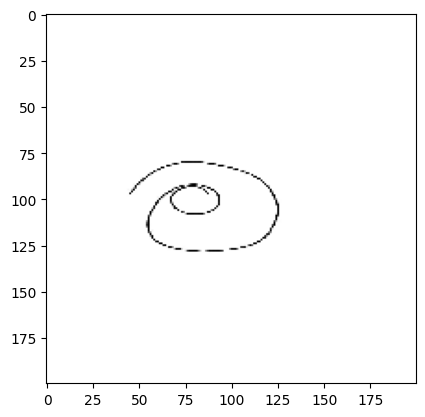

1/1 [==============================] - 0s 51ms/step
This is Letter 's' in Sinhala


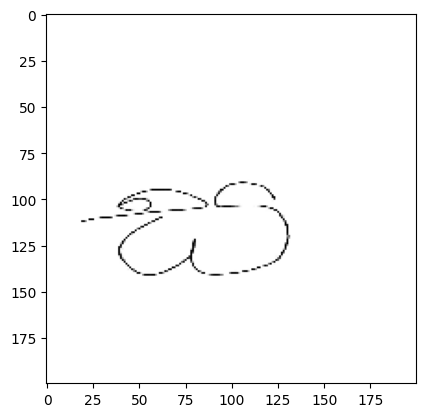

1/1 [==============================] - 0s 49ms/step
This is Letter 'm' in Sinhala


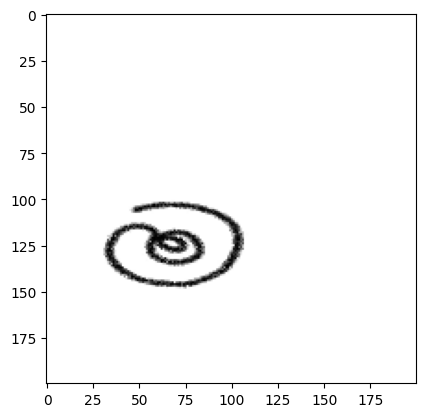

1/1 [==============================] - 0s 60ms/step
This is Letter 's' in Sinhala


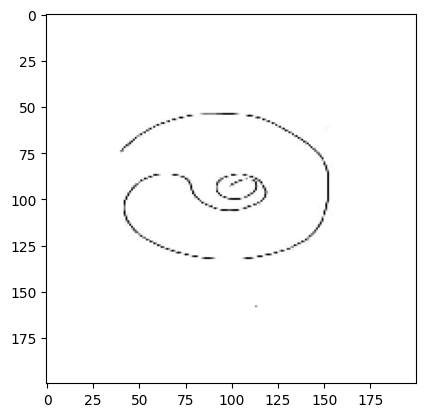

1/1 [==============================] - 0s 58ms/step
This is Letter 's' in Sinhala


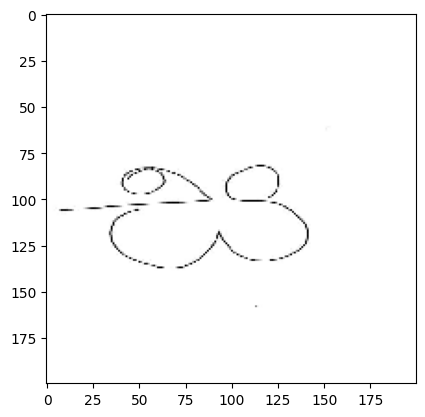

1/1 [==============================] - 0s 62ms/step
This is Letter 'm' in Sinhala


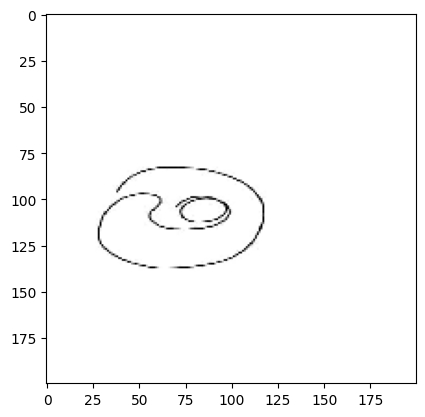

1/1 [==============================] - 0s 64ms/step
This is Letter 's' in Sinhala


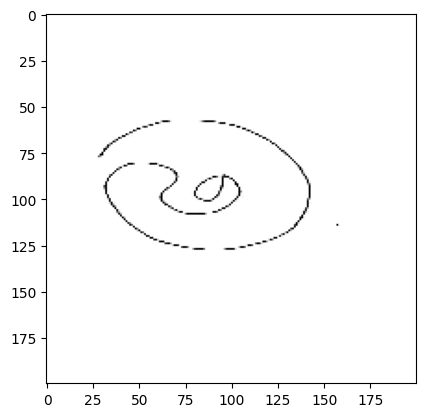

1/1 [==============================] - 0s 68ms/step
This is Letter 's' in Sinhala


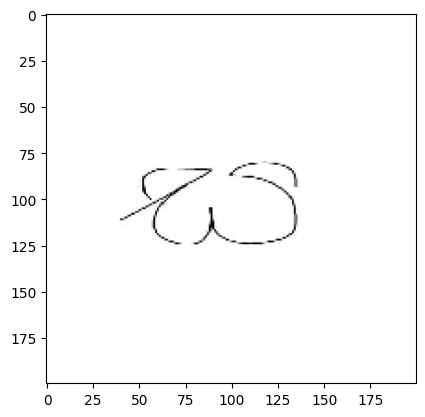

1/1 [==============================] - 0s 41ms/step
This is Letter 'm' in Sinhala


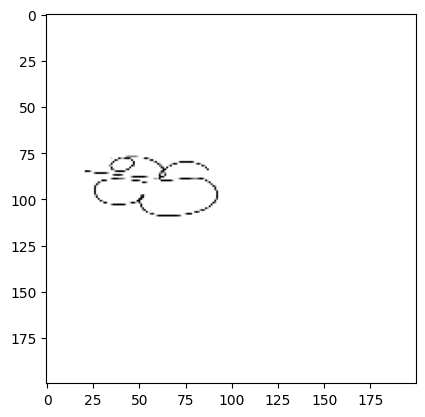

1/1 [==============================] - 0s 44ms/step
This is Letter 'm' in Sinhala


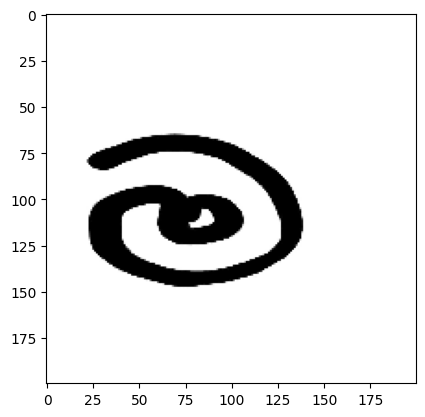

1/1 [==============================] - 0s 34ms/step
This is Letter 's' in Sinhala


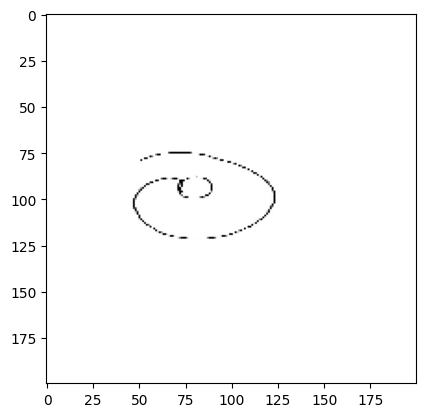

1/1 [==============================] - 0s 36ms/step
This is Letter 's' in Sinhala


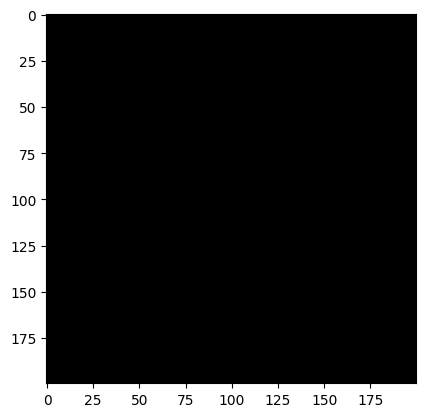

1/1 [==============================] - 0s 36ms/step
This is Letter 'm' in Sinhala


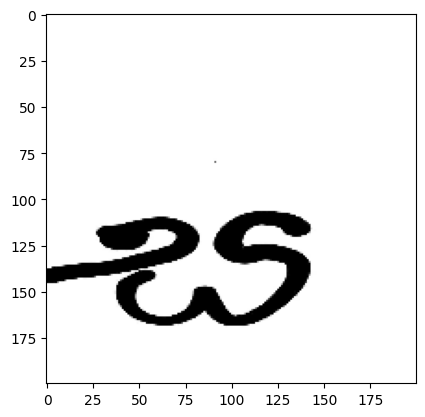

1/1 [==============================] - 0s 33ms/step
This is Letter 'm' in Sinhala


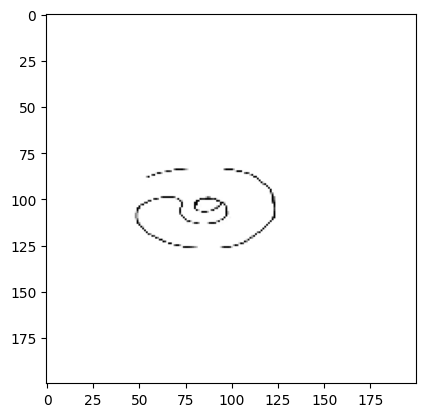

1/1 [==============================] - 0s 32ms/step
This is Letter 's' in Sinhala


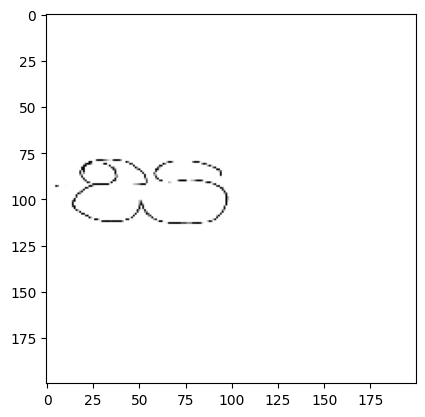

1/1 [==============================] - 0s 39ms/step
This is Letter 'm' in Sinhala


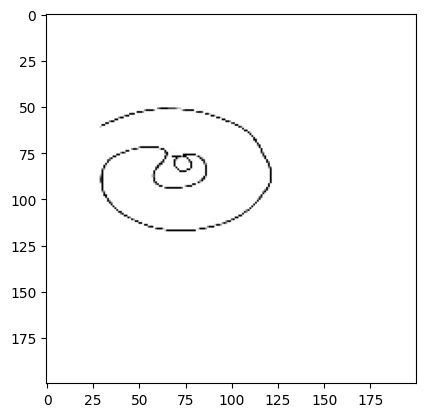

1/1 [==============================] - 0s 33ms/step
This is Letter 's' in Sinhala


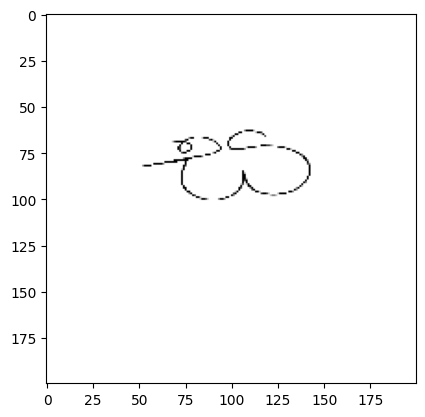

1/1 [==============================] - 0s 36ms/step
This is Letter 'm' in Sinhala


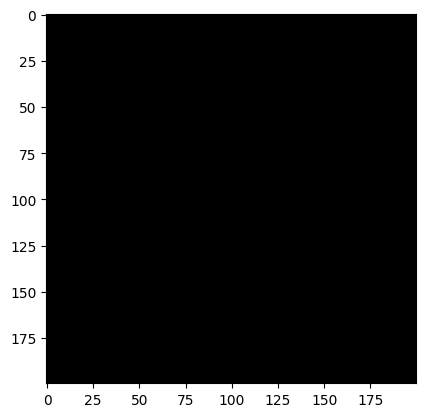

1/1 [==============================] - 0s 32ms/step
This is Letter 'm' in Sinhala


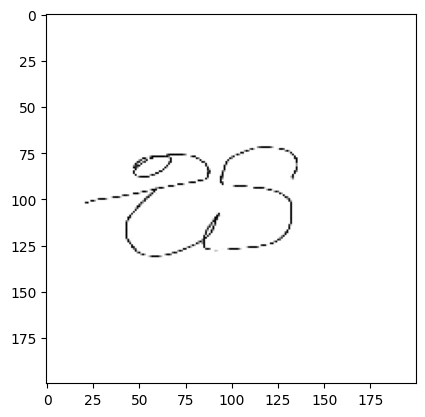

1/1 [==============================] - 0s 32ms/step
This is Letter 'm' in Sinhala


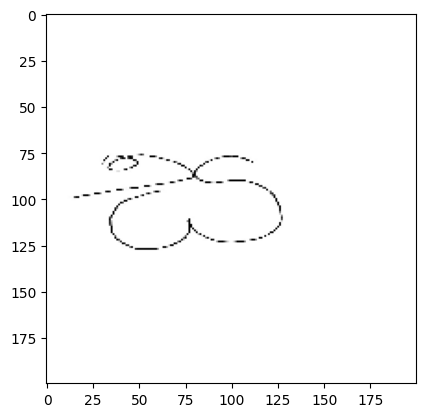

1/1 [==============================] - 0s 34ms/step
This is Letter 'm' in Sinhala


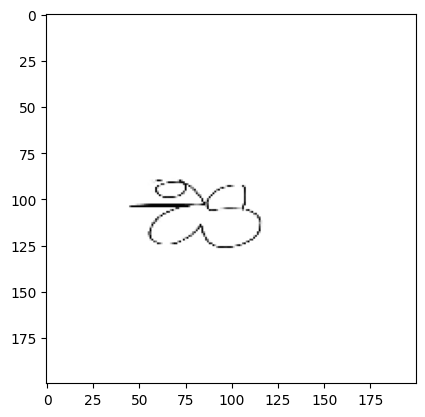

1/1 [==============================] - 0s 34ms/step
This is Letter 'm' in Sinhala


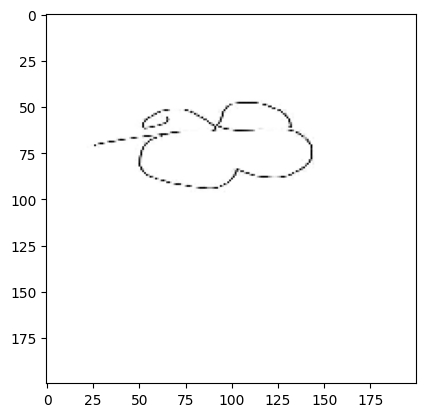

1/1 [==============================] - 0s 33ms/step
This is Letter 's' in Sinhala


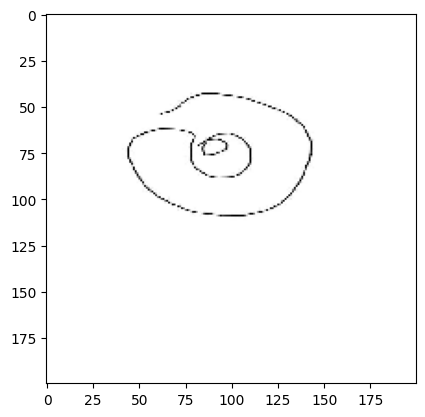

1/1 [==============================] - 0s 35ms/step
This is Letter 's' in Sinhala


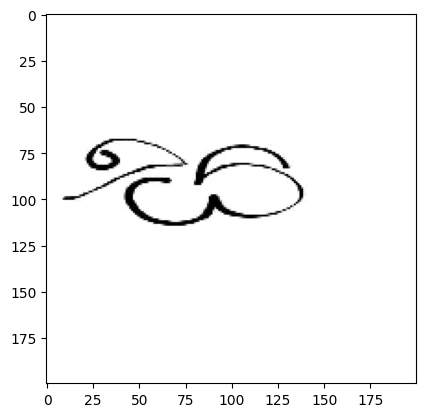

1/1 [==============================] - 0s 36ms/step
This is Letter 'm' in Sinhala


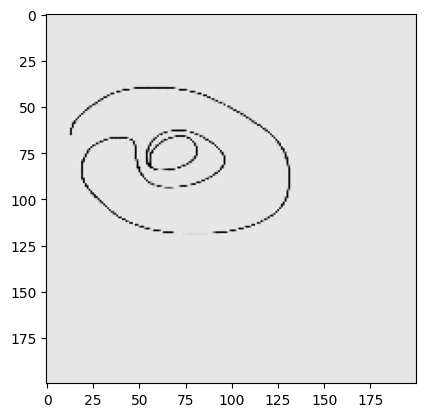

1/1 [==============================] - 0s 34ms/step
This is Letter 's' in Sinhala


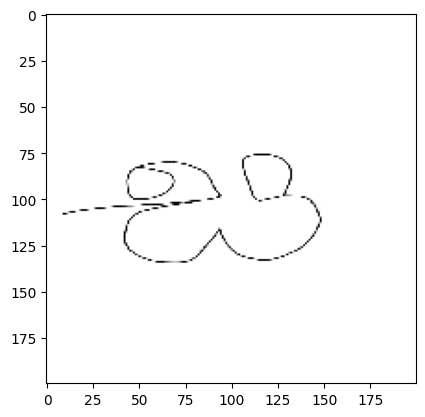

1/1 [==============================] - 0s 34ms/step
This is Letter 'm' in Sinhala


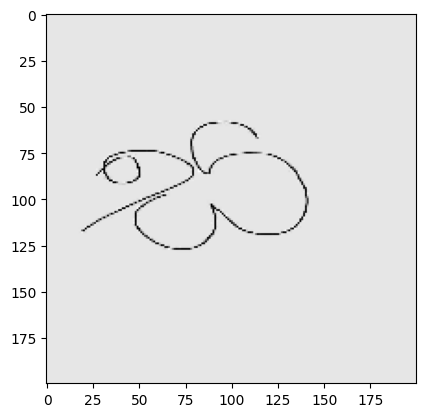

1/1 [==============================] - 0s 35ms/step
This is Letter 'm' in Sinhala


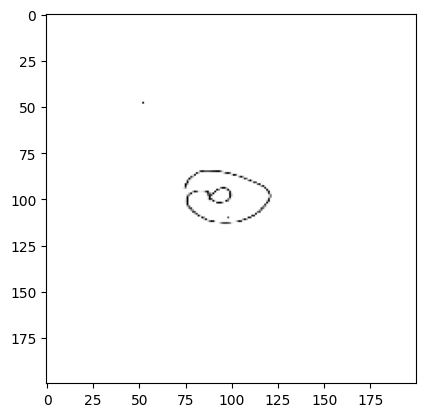

1/1 [==============================] - 0s 32ms/step
This is Letter 's' in Sinhala


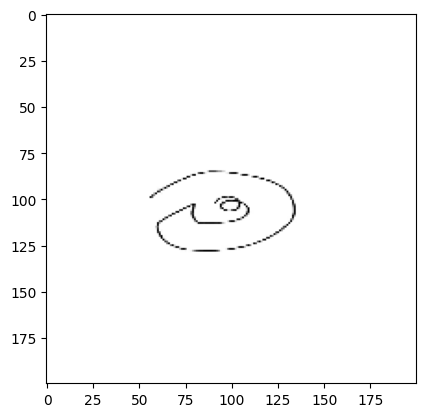

1/1 [==============================] - 0s 35ms/step
This is Letter 's' in Sinhala


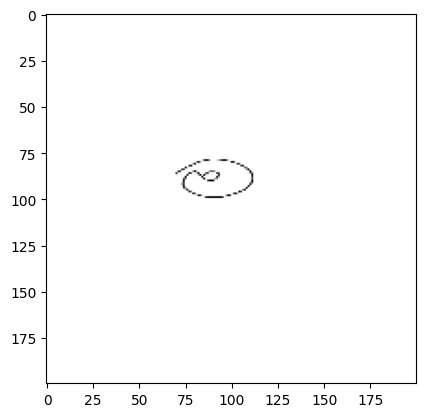

1/1 [==============================] - 0s 39ms/step
This is Letter 's' in Sinhala


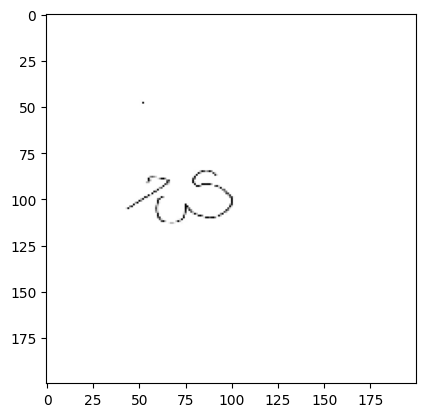

1/1 [==============================] - 0s 40ms/step
This is Letter 'm' in Sinhala


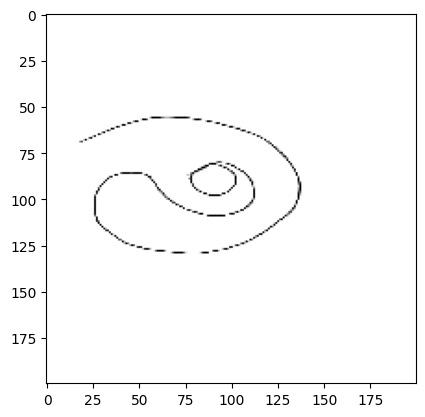

1/1 [==============================] - 0s 40ms/step
This is Letter 's' in Sinhala


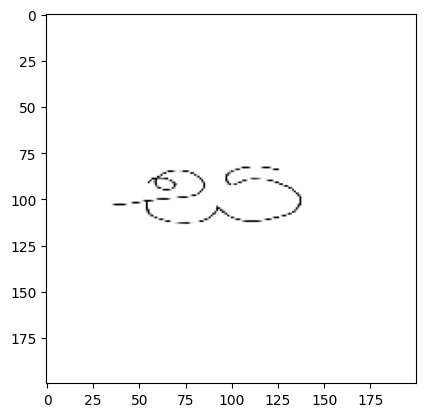

1/1 [==============================] - 0s 43ms/step
This is Letter 'm' in Sinhala


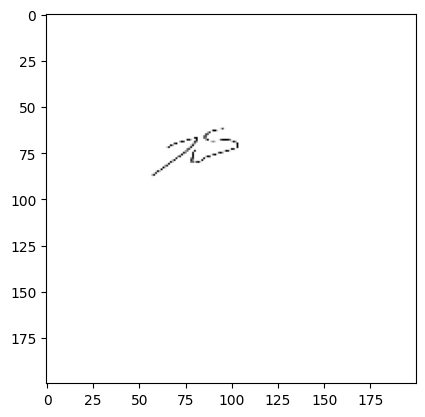

1/1 [==============================] - 0s 39ms/step
This is Letter 'm' in Sinhala


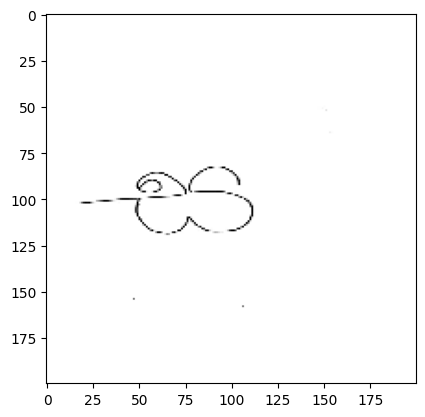

1/1 [==============================] - 0s 41ms/step
This is Letter 'm' in Sinhala


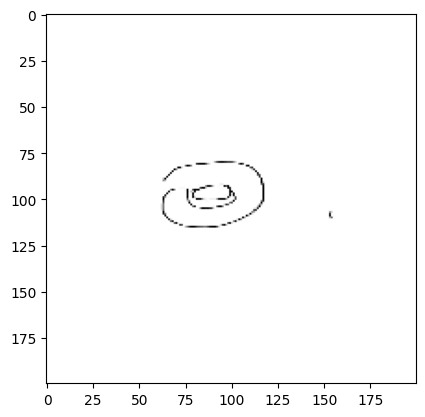

1/1 [==============================] - 0s 44ms/step
This is Letter 's' in Sinhala


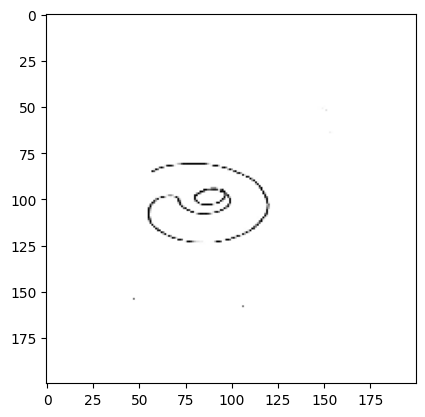

1/1 [==============================] - 0s 58ms/step
This is Letter 's' in Sinhala


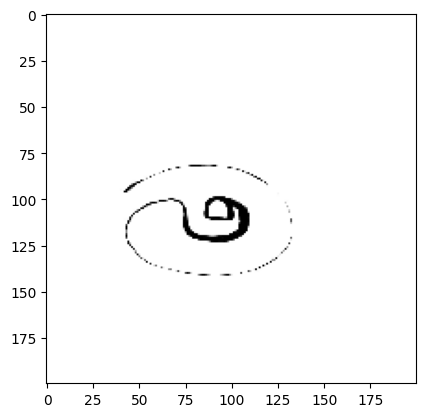

1/1 [==============================] - 0s 64ms/step
This is Letter 's' in Sinhala


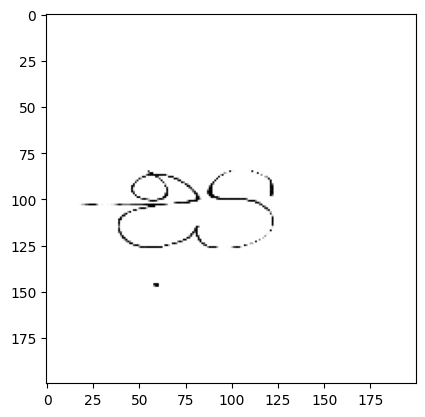

1/1 [==============================] - 0s 54ms/step
This is Letter 'm' in Sinhala


In [24]:
dir_path = 'Testing/'

# Loop over each file in the directory
for i in os.listdir(dir_path):
  # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Letter 's' in Sinhala")
  else:
    print("This is Letter 'm' in Sinhala")